# Movie Success Prediction

* Name: Harshil Amin
* Student Id: 235848750

# Load Dataset by directly downloading it from kaggle

The code automates downloading datasets from Kaggle by embedding the API key directly into the notebook. It installs Kaggle API and sets API credentials by Storeing username and API key in a dictionary.It configures kaggle directory and saves the API key into the required kaggle.json file and sets file permissions to protect the kaggle.json file from unauthorized access.
Then it uses the Kaggle API to fetch the specified dataset as a ZIP file and extracts the dataset by unzipping the file for immediate use.

In [1]:
# Install Kaggle API
!pip install kaggle

# Set up Kaggle API credentials directly in the notebook
import os
kaggle_api_key = {
    "username": "aminharshil",
    "key": "06c85a42aa283df352c946a75fe37cca"
}

# Create the Kaggle configuration directory if it doesn't exist
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Write the kaggle.json file with API credentials
with open(os.path.join(kaggle_dir, "kaggle.json"), "w") as f:
    import json
    json.dump(kaggle_api_key, f)

# Set the required permissions for the file
os.chmod(os.path.join(kaggle_dir, "kaggle.json"), 0o600)

# Placeholder with your Kaggle dataset's information
DATASET_NAME = "tmdb/tmdb-movie-metadata"

# Download the dataset
!kaggle datasets download -d {DATASET_NAME}

# Unzip the dataset
import zipfile
with zipfile.ZipFile(f"{DATASET_NAME.split('/')[-1]}.zip", 'r') as zip_ref:
    zip_ref.extractall("./")


Dataset URL: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
License(s): other
 56% 5.00M/8.89M [00:00<00:00, 30.7MB/s]
100% 8.89M/8.89M [00:00<00:00, 41.7MB/s]


Installing the required libraries ('numpy' and 'pandas') using pip and then imports them, along with other necessary modules for data analysis and visualization.

In [3]:
!pip install numpy pandas

In [4]:
import json
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph
from numpy import median
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from pylab import rcParams
import matplotlib
from collections import Counter
%matplotlib inline

# Data Loading and Preprocessing:


* The notebook starts by loading movie data from two CSV files: which are in tmdb_5000_movies.csv and tmdb_5000_credits.csv files.
* Data cleaning is done on the data in which some of the data cleaning duties include converting variable types, creating new variable from the existing ones, and dealing with data missing values.
* One-hot encoding is used to develop new categorical features out of other categorical features including Budget categories, Release seasons, Duration Categories, and Genres among others.

First, let's load the movie dataset with release date

In [5]:
def load_tmdb_movies(path):
    file = pd.read_csv(path)
    file['release_date'] = pd.to_datetime(file['release_date']).apply(lambda x: x.date()) #convert to date time for us
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages'] #these are json cols
    for column in json_columns:
        file[column] = file[column].apply(json.loads)
    return file

test = load_tmdb_movies("/content/tmdb_5000_movies.csv")
test.head()

budget                                             genres  \
0  237000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
1  300000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  245000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
3  250000000  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
4  260000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{'id': 1463, 'name': 'culture clash'}, {'id':...                en   
1  [{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...                en   
2  [{'id': 470, 'name': 'spy'}, {'id': 818, 'name...                en   
3  [{'id': 849, 'name': 'dc comics'}, {'id': 853,...                en   
4  [{'id': 818, 'name': 'based on novel'}, {'id':...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{'name': 'Ingenious Film Partners', 'id': 289...   
1  [{'name': 'Walt Disney Pictures', 'id': 2}, {'...   
2  [{'name': 'Columbia Pictures', 'id': 5}, {'nam...   
3  [{'name': 'Legendary Pictures', 'id': 923}, {'...   
4        [{'name': 'Walt Disney Pictures', 'id': 2}]   

                                production_countries release_date     revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2009-12-10  2787965087   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   2007-05-19   961000000   
2  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...   2015-10-26   880674609   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   2012-07-16  1084939099   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
1    169.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2    148.0  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  Released   
3    165.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4    132.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

This code contains one function which is the load_tmdb_credits and then this function will be used to load data from the file “tmdb_5000_credits.csv”. Information on the cast and crews of this movie are found in this file.

In [6]:
def load_tmdb_credits(path):
    file = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        # Check if the column exists before applying json.loads
        if column in file.columns:
            file[column] = file[column].apply(json.loads)
    return file

# Call the function with the correct file path for credits data
test_credits = load_tmdb_credits("/content/tmdb_5000_credits.csv")
test_credits.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{'cast_id': 242, 'character': 'Jake Sully', '...   
1  [{'cast_id': 4, 'character': 'Captain Jack Spa...   
2  [{'cast_id': 1, 'character': 'James Bond', 'cr...   
3  [{'cast_id': 2, 'character': 'Bruce Wayne / Ba...   
4  [{'cast_id': 5, 'character': 'John Carter', 'c...   

                                                crew  
0  [{'credit_id': '52fe48009251416c750aca23', 'de...  
1  [{'credit_id': '52fe4232c3a36847f800b579', 'de...  
2  [{'credit_id': '54805967c3a36829b5002c41', 'de...  
3  [{'credit_id': '52fe4781c3a36847f81398c3', 'de...  
4  [{'credit_id': '52fe479ac3a36847f813eaa3', 'de...

Loading the movie data from two separate CSV (Comma Separated Values) files into the notebook for further analysis.

In [7]:
#LOAD CSV's
movies = load_tmdb_movies("/content/tmdb_5000_movies.csv")
credits = load_tmdb_credits("/content/tmdb_5000_credits.csv")


*The code is devoted to data conversion arising from movies, which are fetched from The Movie Database (TMDb) format into the format similar to Internet Movie Database (IMDB). It also has a two-fold use: it prepares for the possible reuse of some existing analytical tools or models originally developed for IMDB data and achieves more consistent data features for more fundamental comparisons. In addition, there are enhanced measures in checking data processing errors like safe_access function that gives graceful methods of handling situations where the data is missing or nested. Most importantly, the code uses features from the TMDb data set such as director and actors names, genres, keywords, which are expected to be used as input parameters in the movie success prediction model.*

In [8]:
# THESE FUNCTIONS ARE IF WE NEED EXTRA FIELDS LATER from imdb
#GOAL to predict if a movie is nice before it releases
LOST_COLUMNS = [
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'aspect_ratio',
    'cast_total_facebook_likes',
    'color',
    'content_rating',
    'director_facebook_likes',
    'facenumber_in_poster',
    'movie_facebook_likes',
    'movie_imdb_link',
    'num_critic_for_reviews',
    'num_user_for_reviews'
                ]

# Columns in TMDb that had direct equivalents in the IMDB version.
# These columns can be used with old kernels just by changing the names
TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES = {
    'budget': 'budget',
    'genres': 'genres',
    'revenue': 'gross',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',  # it's possible that spoken_languages would be a better match
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users',
                                         }

IMDB_COLUMNS_TO_REMAP = {'imdb_score': 'vote_average'}


def safe_access(container, index_values):
    # return a missing value rather than an error upon indexing/key failure
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except (IndexError, KeyError, TypeError):  # Handle TypeError for cases where result is not subscriptable
        return np.nan


def get_director(crew_data):
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return safe_access(directors, [0])


def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])


def convert_to_original_format(movies, credits):
    # Converts TMDb data to make it as compatible as possible with kernels built on the original version of the data.
    tmdb_movies = movies.copy()
    tmdb_movies.rename(columns=TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES, inplace=True)
    tmdb_movies['title_year'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.year)
    tmdb_movies['title_month'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.month)

    # I'm assuming that the first production country is equivalent, but have not been able to validate this
    tmdb_movies['country'] = tmdb_movies['production_countries'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['language'] = tmdb_movies['spoken_languages'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['director_name'] = credits['crew'].apply(get_director)
    tmdb_movies['actor_1_name'] = credits['cast'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['actor_2_name'] = credits['cast'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['actor_3_name'] = credits['cast'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['companies_1'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['companies_2'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['companies_3'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['genres'] = tmdb_movies['genres'].apply(pipe_flatten_names)
    tmdb_movies['plot_keywords'] = tmdb_movies['plot_keywords'].apply(pipe_flatten_names)
    return tmdb_movies

In [9]:
pretreated_data = convert_to_original_format(movies, credits)
pretreated_data.head()

budget                                    genres  \
0  237000000  Action|Adventure|Fantasy|Science Fiction   
1  300000000                  Adventure|Fantasy|Action   
2  245000000                    Action|Adventure|Crime   
3  250000000               Action|Crime|Drama|Thriller   
4  260000000          Action|Adventure|Science Fiction   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                       plot_keywords  language  \
0  culture clash|future|space war|space colony|so...   English   
1  ocean|drug abuse|exotic island|east india trad...   English   
2  spy|based on novel|secret agent|sequel|mi6|bri...  Français   
3  dc comics|crime fighter|terrorist|secret ident...   English   
4  based on novel|mars|medallion|space travel|pri...   English   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ... title_year  \
0  [{'name': 'Ingenious Film Partners', 'id': 289...  ...     2009.0   
1  [{'name': 'Walt Disney Pictures', 'id': 2}, {'...  ...     2007.0   
2  [{'name': 'Columbia Pictures', 'id': 5}, {'nam...  ...     2015.0   
3  [{'name': 'Legendary Pictures', 'id': 923}, {'...  ...     2012.0   
4        [{'name': 'Walt Disney Pictures', 'id': 2}]  ...     2012.0   

  title_month                   country      director_name     actor_1_name  \
0        12.0  United States of America      James Cameron  Sam Worthington   
1         5.0  United States of America     Gore Verbinski      Johnny Depp   
2        10.0            United Kingdom         Sam Mendes     Daniel Craig   
3         7.0  United States of America  Christopher Nolan   Christian Bale   
4         3.0  United States of America     Andrew Stanton    Taylor Kitsch   

      actor_2_name      actor_3_name              companies_1  \
0      Zoe Saldana  Sigourney Weaver  Ingenious Film Partners   
1    Orlando Bloom   Keira Knightley     Walt Disney Pictures   
2  Christoph Waltz       Léa Seydoux        Columbia Pictures   
3    Michael Caine       Gary Oldman       Legendary Pictures   
4     Lynn Collins   Samantha Morton     Walt Disney Pictures   

                              companies_2              companies_3  
0  Twentieth Century Fox Film Corporation       Dune Entertainment  
1                 Jerry Bruckheimer Films  Second Mate Productions  
2                                  Danjaq                      B24  
3                            Warner Bros.         DC Entertainment  
4                                     NaN                      NaN  

[5 rows x 30 columns]

There are some additional steps we need to take before we will be able to make a clear vision of the data to analyze First, we need to clear the data To do this, let’s delete all the fields that do not contain any meaningful information and check for any out of range values

* Data Cleaning: Some of the columns such as num_voted_users, homepage are excluded from the preprocessed data.
* Correlation Analysis: Usually, to get an idea of the relative correlations between any two Numerical Variables, sns.heatmap is used to create a Correlation Matrix of the Numerical Features in the given Dataset.

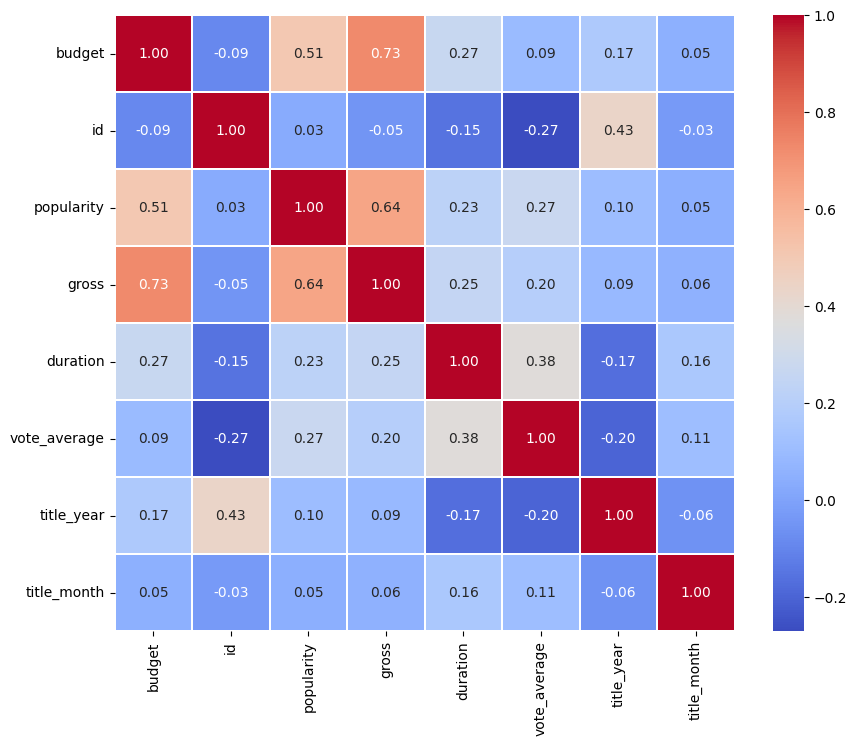

In [10]:
# Drop irrelevant features safely
columns_to_drop = ['num_voted_users', 'homepage']
for col in columns_to_drop:
    if col in pretreated_data.columns:
        pretreated_data.drop([col], axis=1, inplace=True)

# Select only numeric columns for the correlation matrix
numeric_data = pretreated_data.select_dtypes(include=[np.number])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.01)
plt.show()

* Uses sns.pairplot to construct the pair plot in order to analyze how features in the dataset interrelate. This assists in gaining knowledge on the distribution of data and possibly patterns.

<Figure size 1000x800 with 0 Axes>

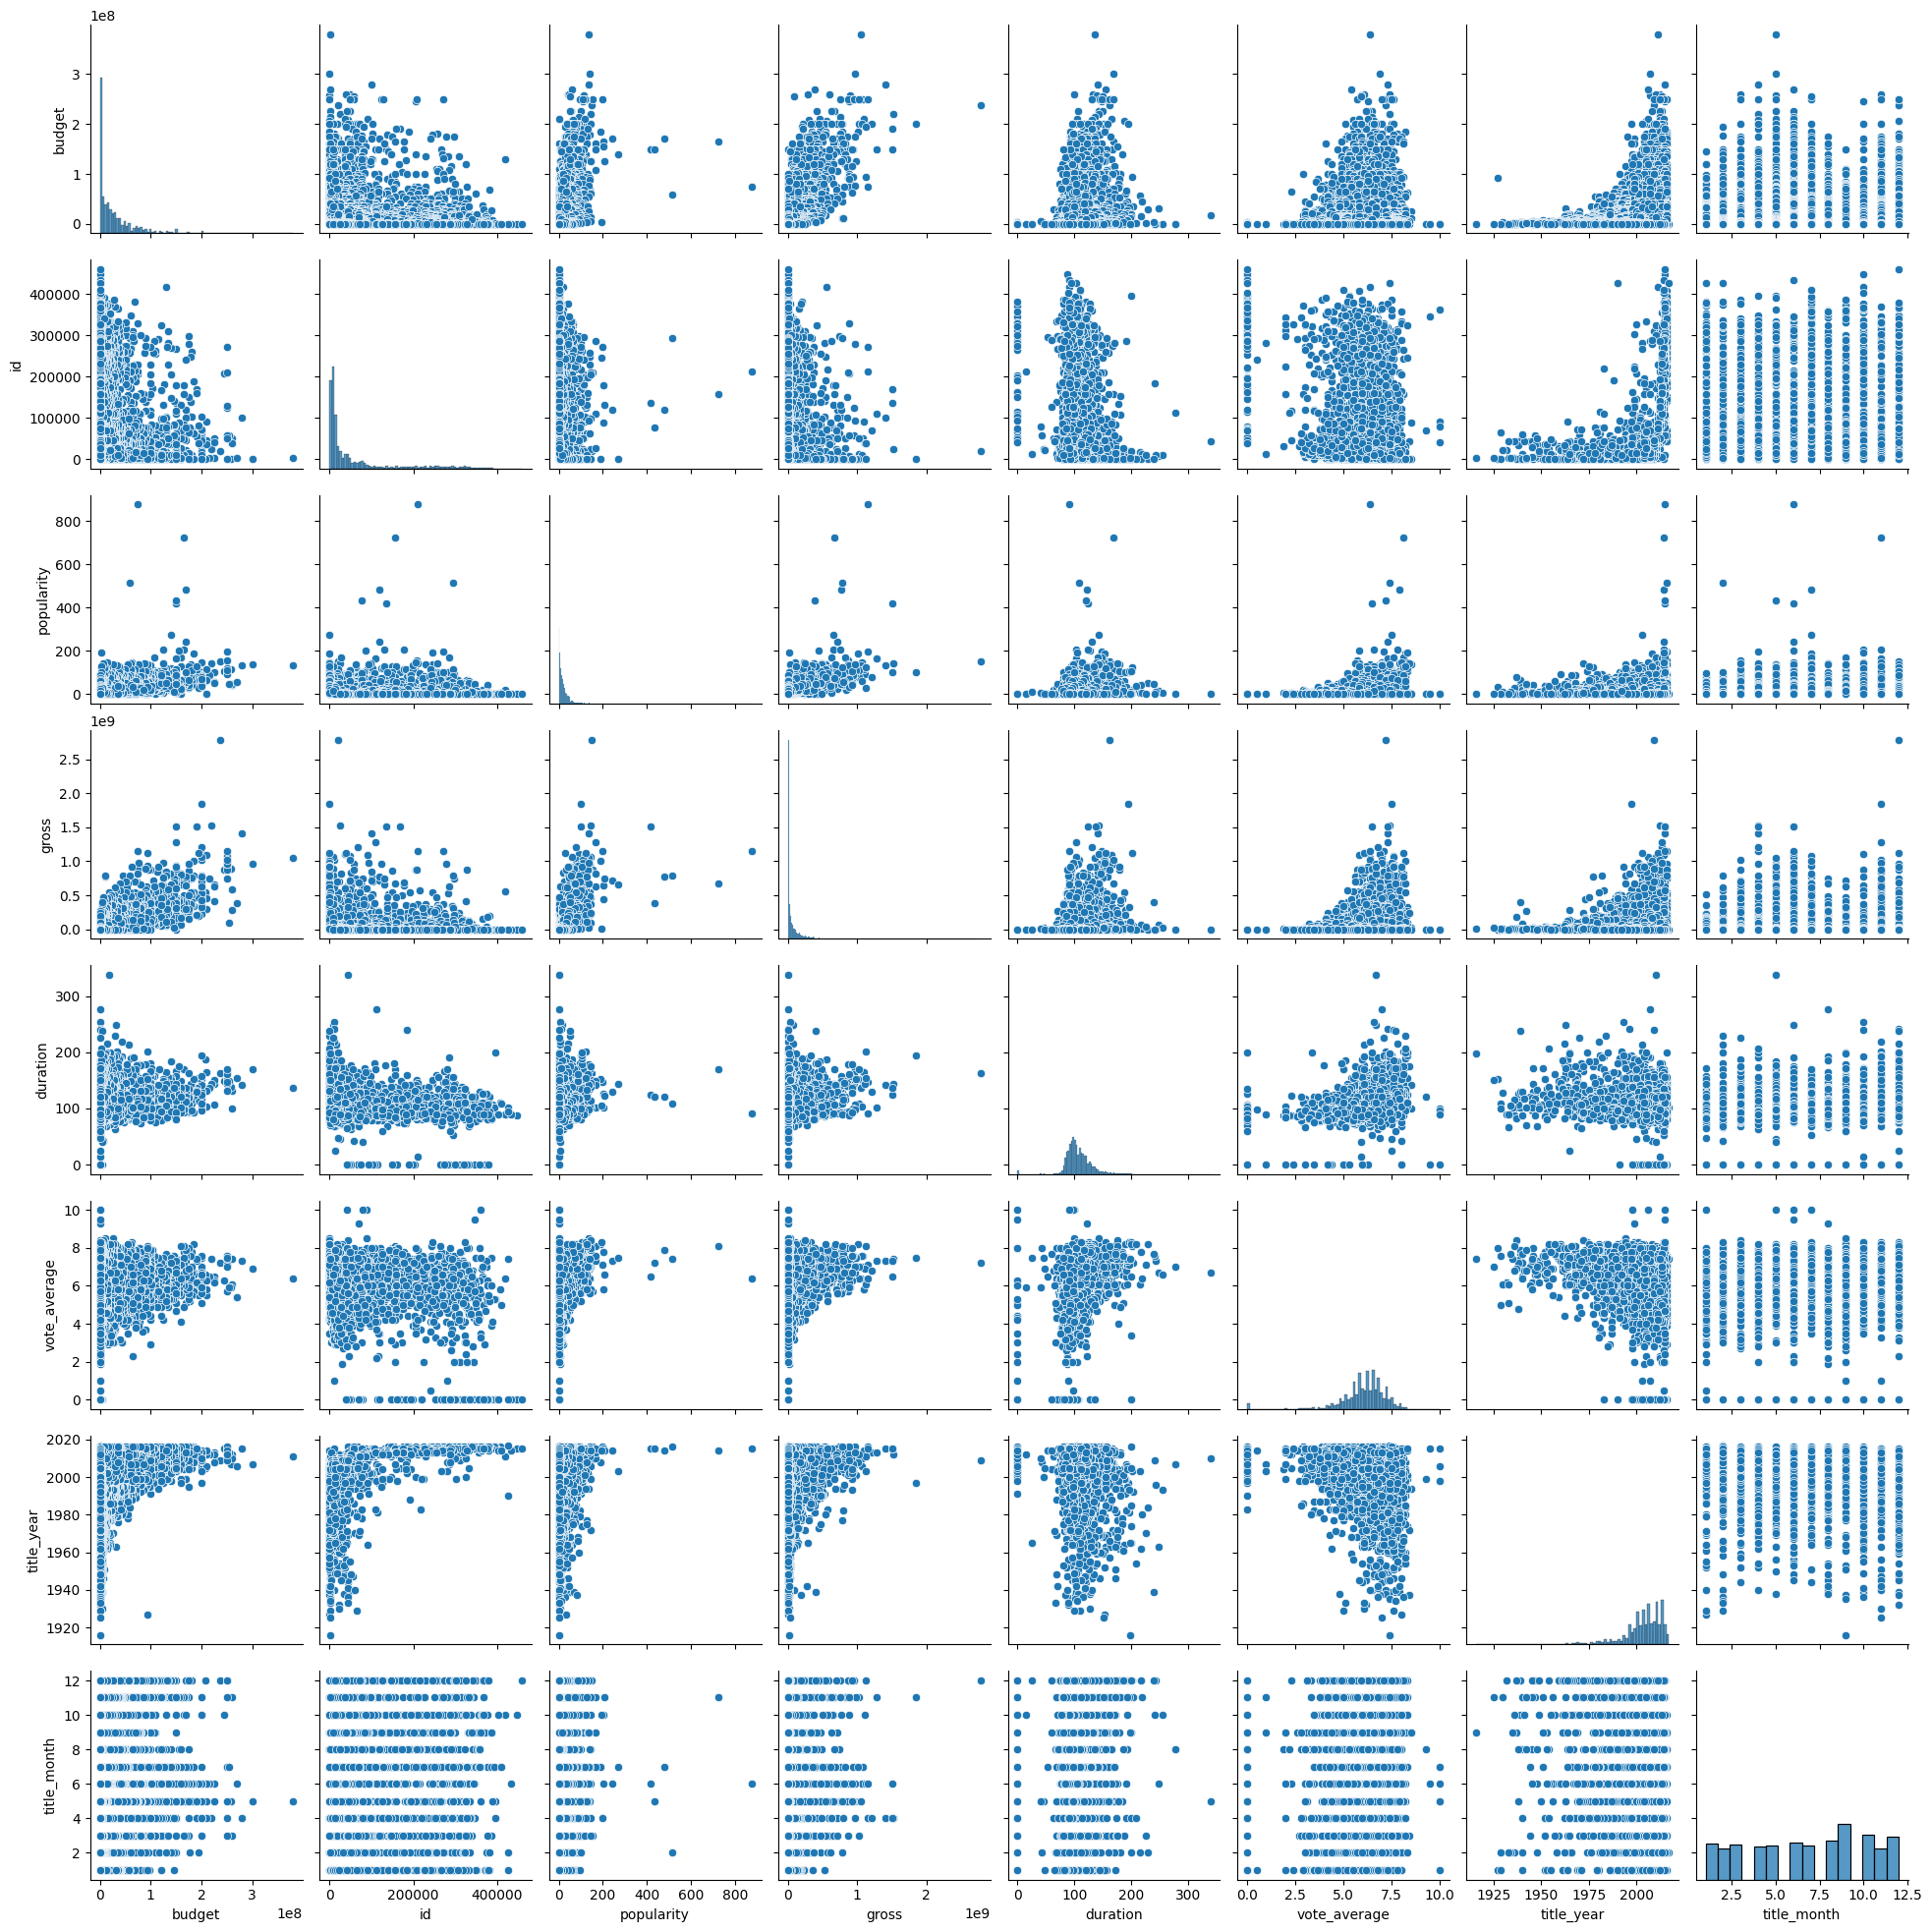

In [11]:
# pair plot to visualize data
plt.figure(figsize = (10,8))
g = sns.pairplot(pretreated_data,palette="bright")



* Preprocesses columns of the DataFrame by dropping rows with vote_average or duration equal to 0. It makes it possible to eliminate invalid values in the data to be utilized for the analysis.

In [12]:
#title year and vote average + duration cleaup
pretreated_data = pretreated_data[pretreated_data['vote_average'] != 0]
pretreated_data = pretreated_data[pretreated_data['duration'] != 0]
pretreated_data.columns
data= pretreated_data.copy()

* Budget Categorization: This code also bins the continuous ‘budget’ variable in order to make them categorical in nature with the use of one hot encoding.
* First it comes up with the standard deviation of the budget and also the Mean.
* Then, new columns are developed (extremelylow, verylow, low, avg, high, veryhigh, blockbusterhigh), then 1 or 0 are given according to the budget ranges of the movie. This assists in developing a somewhat more organized structure of the budget information in the model.

In [13]:
#convert budget into 1's and 0's for budget:
import statistics
sd = statistics.stdev(data.budget)
mean = data.budget.mean()
max = data.budget.max()
min = data.budget.min()

#these are hard coded amount of fields and values we can change this accordingly
#these are def arbitrarly set into
data['extremelylow'] = data['budget'].map(lambda s: 1 if s < 5000000 else 0)
data['verylow'] = data['budget'].map(lambda s: 1 if 5000000 <= s < 10000000 else 0)
data['low'] = data['budget'].map(lambda s: 1 if 10000000 <= s < mean else 0)
data['avg'] = data['budget'].map(lambda s: 1 if  mean <= s < mean+sd  else 0)
data['high'] = data['budget'].map(lambda s: 1 if mean+sd <= s < 100000000 else 0)
data['veryhigh'] = data['budget'].map(lambda s: 1 if 100000000 < s < 150000000 else 0)
data['blockbusterhigh'] = data['budget'].map(lambda s: 1 if s >= 150000000 else 0)

In [14]:
data.head()

budget                                    genres      id  \
0  237000000  Action|Adventure|Fantasy|Science Fiction   19995   
1  300000000                  Adventure|Fantasy|Action     285   
2  245000000                    Action|Adventure|Crime  206647   
3  250000000               Action|Crime|Drama|Thriller   49026   
4  260000000          Action|Adventure|Science Fiction   49529   

                                       plot_keywords  language  \
0  culture clash|future|space war|space colony|so...   English   
1  ocean|drug abuse|exotic island|east india trad...   English   
2  spy|based on novel|secret agent|sequel|mi6|bri...  Français   
3  dc comics|crime fighter|terrorist|secret ident...   English   
4  based on novel|mars|medallion|space travel|pri...   English   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{'name': 'Ingenious Film Partners', 'id': 289...   
1  [{'name': 'Walt Disney Pictures', 'id': 2}, {'...   
2  [{'name': 'Columbia Pictures', 'id': 5}, {'nam...   
3  [{'name': 'Legendary Pictures', 'id': 923}, {'...   
4        [{'name': 'Walt Disney Pictures', 'id': 2}]   

                                production_countries  ...  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...  ...   
1  [{'iso_3166_1': 'US', 'name': 'United States o...  ...   
2  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...  ...   
3  [{'iso_3166_1': 'US', 'name': 'United States o...  ...   
4  [{'iso_3166_1': 'US', 'name': 'United States o...  ...   

               companies_1                             companies_2  \
0  Ingenious Film Partners  Twentieth Century Fox Film Corporation   
1     Walt Disney Pictures                 Jerry Bruckheimer Films   
2        Columbia Pictures                                  Danjaq   
3       Legendary Pictures                            Warner Bros.   
4     Walt Disney Pictures                                     NaN   

               companies_3 extremelylow verylow low avg  high  veryhigh  \
0       Dune Entertainment            0       0   0   0     0         0   
1  Second Mate Productions            0       0   0   0     0         0   
2                      B24            0       0   0   0     0         0   
3         DC Entertainment            0       0   0   0     0         0   
4                      NaN            0       0   0   0     0         0   

   blockbusterhigh  
0                1  
1                1  
2                1  
3                1  
4                1  

[5 rows x 35 columns]

In [15]:
data.columns

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'title_month', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3', 'extremelylow', 'verylow', 'low', 'avg', 'high',
       'veryhigh', 'blockbusterhigh'],
      dtype='object')

* Season Categorization: Like in the case of budget categorization, this cell also converts the release month (title_month) into seasons such as Spring, Summer, Fall or Winter, by using one-hot encoding. This may enable the model to capture when movies are most likely to succeed in the theater from the trend line.

In [16]:
#convert month to season
data['Spring'] = data['title_month'].map(lambda s: 1 if 1 <= s <= 4 else 0)
data['Summer'] = data['title_month'].map(lambda s: 1 if 5 <= s <= 7 else 0)
data['Fall'] = data['title_month'].map(lambda s: 1 if 8 <= s <= 9 else 0)
data['Winter'] = data['title_month'].map(lambda s: 1 if 10 <= s <= 12 else 0)

*  Duration Categorization: Following code converts the movie duration into four categories namely – Lessthan90, 90-120, 120-150 and Morethan150 by one-hot encoder approach.

In [17]:
#duration
data = data[np.isfinite(data['duration'])]
data = data.copy()
data.loc[:, 'Lessthan90'] = data['duration'].map(lambda s: 1 if s < 90 else 0)
data.loc[:, '90-120'] = data['duration'].map(lambda s: 1 if 90 <= s < 120 else 0)
data.loc[:, '120-150'] = data['duration'].map(lambda s: 1 if 120 <= s < 150 else 0)
data.loc[:, 'Morethan150'] = data['duration'].map(lambda s: 1 if s >= 150 else 0)
data.columns

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'title_month', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3', 'extremelylow', 'verylow', 'low', 'avg', 'high',
       'veryhigh', 'blockbusterhigh', 'Spring', 'Summer', 'Fall', 'Winter',
       'Lessthan90', '90-120', '120-150', 'Morethan150'],
      dtype='object')

* Genre Categorization: This code splits individual genres out of the ‘genres’ column and makes new columns for each genre using one-hot encoded manner.
* genresUnflattened: This line of code utilizes list comprehension taking advantage of the split method to convert the pipe separated genres in each row.
* genres: The line of code below gets you all the different genres in the dataset through a set comprehension and then filters out the duplicates. Specified list is further cleaned, as the empty string is not considered as a genre.
* The loop assigns a value at the end of the first row for each different genre, that forms a new column in the dataframe having the same name as the genre. It gives a 1 to the given column if the movie was in that particular genre and 0 if the movie was not in that particular genre.

In [18]:
#genre
# impact on cross-validation scores:
# popularity success -> +3
# vote success -> +2.5-3
# commercial success -> -4.5-5
data['genres'].head()
genresUnflattened = list(map(lambda x: x.split('|'), data['genres']))
genres = set([item for subl in genresUnflattened for item in subl])
genres.remove('')
for genre in genres:
    data[genre] = data['genres'].map(lambda s: 1 if genre in str(s) else 0)
# data1.head()
data.columns

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'title_month', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3', 'extremelylow', 'verylow', 'low', 'avg', 'high',
       'veryhigh', 'blockbusterhigh', 'Spring', 'Summer', 'Fall', 'Winter',
       'Lessthan90', '90-120', '120-150', 'Morethan150', 'Adventure',
       'Thriller', 'Action', 'Foreign', 'Comedy', 'Family', 'History', 'Music',
       'Horror', 'Western', 'Drama', 'Crime', 'Animation', 'War', 'TV Movie',
       'Science Fiction', 'Mystery', 'Fantasy', 'Documentary', 'Romance'],
      dtype='object')

# Success Metrics:

* Three success metrics are defined: Popularity Success which is calculated from popularity score, Vote Success which is calculated from average vote and Commercial Success where the total gross is over the total production budget.
* A “True Success” metric is obtained from these three metrics, using logical conditions.

*measurement for success*
* Defining Success Metrics: This cell also identifies three types of success for a movie namely; Popularity Success, Vote Success, as well as Commercial Success.
* Popularity Success: The amount of popularity within the field gives a movie popularity score: If the score is greater than the average popularity then the movie is said to have had a popularity success.
* Vote Success: A vote success is an average vote superior to the average vote of a movie.
* Commercial Success: This means a movie is called a commercial success if the grossing amount it has acquired is higher than the amount used to fund it.
* True Success: This cell unites the three success factors into what the author identifies as the ‘True Success’ factor. It employs different logical condition (Condition All, Condition 1 or more, and, Condition 2 or more), to establish whether a movie is ‘truly’ successful given different combination of the foregoing success factors.

In [19]:
#Actually these are the 3 success in a nutshell
popularity_data = data.copy()
popularity_data['Popularity Success'] = popularity_data['popularity'].map(lambda s :1  if s >= popularity_data['popularity'].mean() else 0)
popularity_data['Vote Success'] = popularity_data['vote_average'].map(lambda s :1  if s >= popularity_data['vote_average'].mean() else 0)
popularity_data['Commercial Success'] = popularity_data['gross'] > popularity_data['budget']
popularity_data['Commercial Success'] = popularity_data['Commercial Success'].astype(int)


#metrics for true success
condition2orMore = (((popularity_data['Popularity Success'] == 1) & (popularity_data['Vote Success'] == 1)) |
             ((popularity_data['Popularity Success'] == 1) & (popularity_data['Commercial Success'] == 1)) |
             ((popularity_data['Commercial Success'] == 1) & (popularity_data['Vote Success'] == 1)))

condition1orMore = ((popularity_data['Popularity Success'] == 1) |
                 (popularity_data['Vote Success'] == 1) |
                 (popularity_data['Commercial Success'] == 1))

conditionAll = ((popularity_data['Popularity Success'] == 1) &
                 (popularity_data['Vote Success'] == 1) &
                 (popularity_data['Commercial Success'] == 1))

popularity_data['True Success'] = np.where(conditionAll, 1, 0)


In [20]:
popularity_data.columns

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'title_month', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3', 'extremelylow', 'verylow', 'low', 'avg', 'high',
       'veryhigh', 'blockbusterhigh', 'Spring', 'Summer', 'Fall', 'Winter',
       'Lessthan90', '90-120', '120-150', 'Morethan150', 'Adventure',
       'Thriller', 'Action', 'Foreign', 'Comedy', 'Family', 'History', 'Music',
       'Horror', 'Western', 'Drama', 'Crime', 'Animation', 'War', 'TV Movie',
       'Science Fiction', 'Mystery', 'Fantasy', 'Documentary', 'Romance',
       'Popularity Success', 'Vote Success', 'Commercial Success',
       'True Success'],
      dtype='object')

# Exploratory Data Analysis(EDA):

visualization of the features x Success before we drop all the unnecessary columns
* Visualization of Success by Release Month: This cell also makes a kernel density plot in order to compare the successful and unsuccessful movies in every release month.
It uses sns.kdeplot to plot the density of “’title_month’ for moviest that were not successful (“True Success” == 0) is in blueviolet and for the successful movies (“True Success” == 1) is in gold.
* This visualization is useful in finding out if there is any correlation between release of a movie and its probable success.

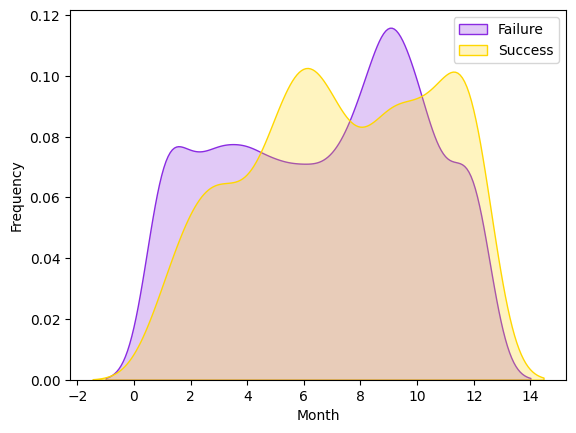

In [21]:
#title_month
g = sns.kdeplot(popularity_data.title_month[(popularity_data["True Success"] == 0) ], color="blueviolet", fill = True)
g = sns.kdeplot(popularity_data.title_month[(popularity_data["True Success"] == 1) ], ax =g, color="gold", fill = True)
g.set_xlabel("Month")
g.set_ylabel("Frequency")
g = g.legend(["Failure","Success"])

* These cells produce similar kernel density plots to illustrate the effect of movie success to the duration.

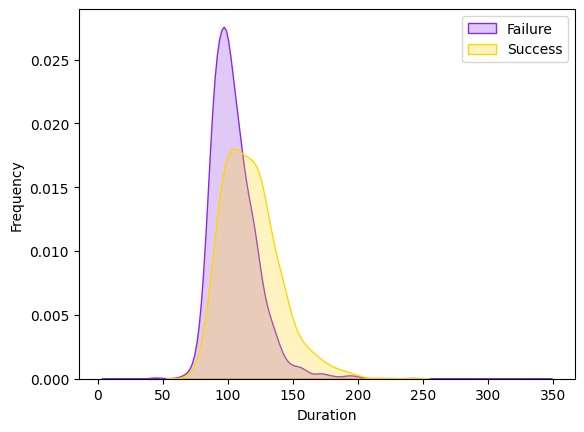

In [22]:
#duration
g = sns.kdeplot(popularity_data.duration[(popularity_data["True Success"] == 0) ], color="blueviolet", fill = True)
g = sns.kdeplot(popularity_data.duration[(popularity_data["True Success"] == 1) ], ax =g, color="gold", fill= True)
g.set_xlabel("Duration")
g.set_ylabel("Frequency")
g = g.legend(["Failure","Success"])

These cells generate same Kernel Density Plots to show impact of movie success and budget.

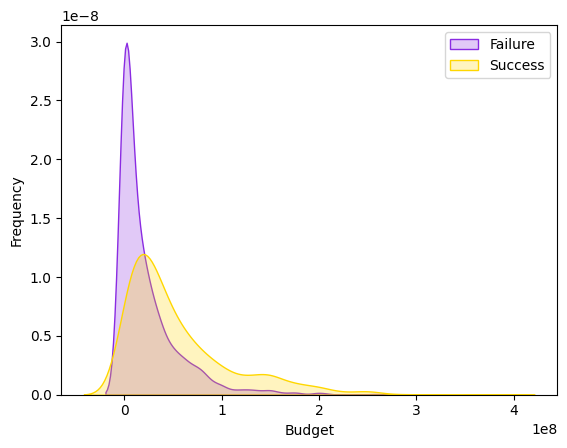

In [23]:
#budget
g = sns.kdeplot(popularity_data.budget[(popularity_data["True Success"] == 0) ], color="blueviolet", fill= True)
g = sns.kdeplot(popularity_data.budget[(popularity_data["True Success"] == 1) ], ax =g, color="gold", fill= True)
g.set_xlabel("Budget")
g.set_ylabel("Frequency")
g = g.legend(["Failure","Success"])

* Correlation Matrix: In order to investigate the relationships between all numerical variables of the dataset, a heatmap is developed.
* This assists in the identification of attributes that post high numbers of correlation to each other as well as to the target label, ‘True Success’.

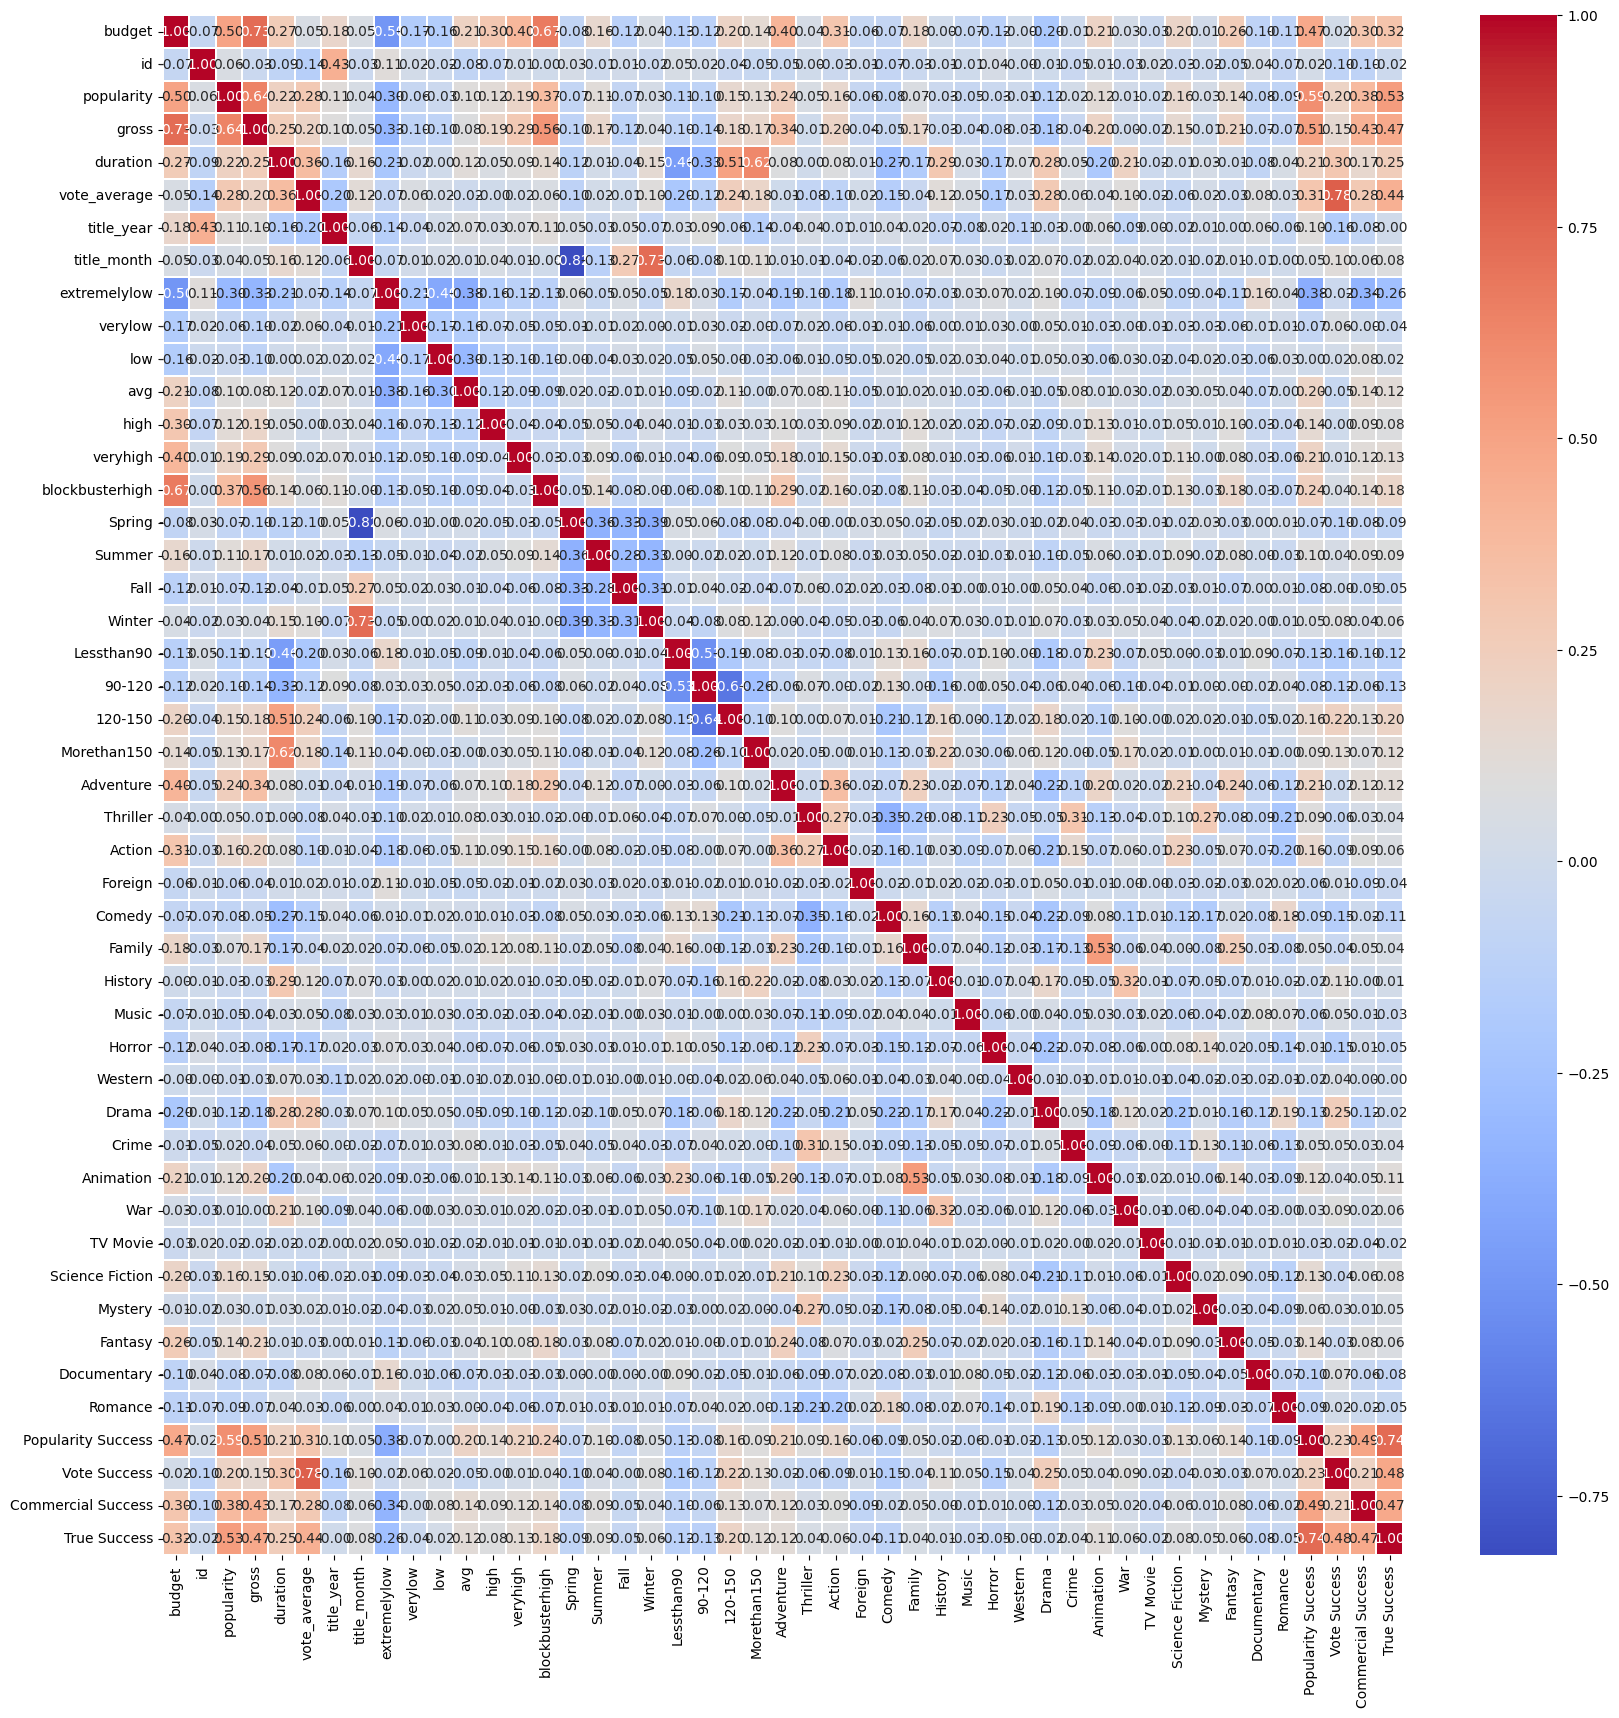

In [24]:
#correlation matrix with numerical values
plt.figure(figsize = (20,20))

# Select only numerical features for correlation analysis
numerical_features = popularity_data.select_dtypes(include=np.number).columns

g = sns.heatmap(popularity_data[numerical_features].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.01)

These cells create pie charts to visualize the proportions of:

* Popularity Success
* Commercial Success
* Vote Success
* True Success

These charts provide the general picture of how success is distributed across these various measures.

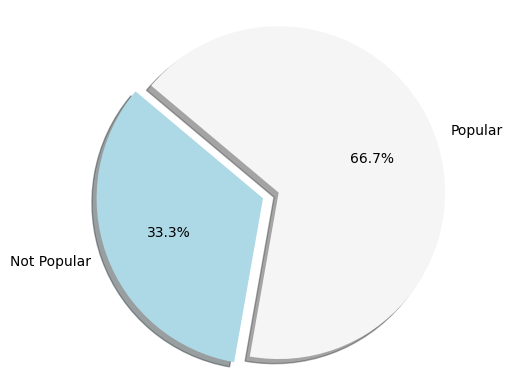

In [25]:
# Data to plot
labels =["Not Popular","Popular"]
sizes = popularity_data['Popularity Success'].value_counts(sort = False)
colors = ["lightblue","whitesmoke"]
explode = (0.1,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140,)
plt.axis('equal')
plt.show()

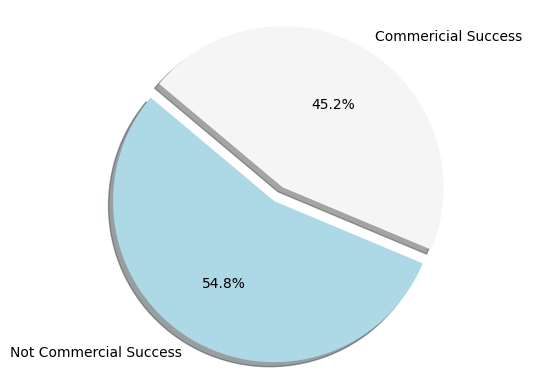

In [26]:
# Data to plot
labels =["Not Commercial Success","Commericial Success"]
sizes = popularity_data['Commercial Success'].value_counts(sort = False)
colors = ["lightblue","whitesmoke"]
explode = (0.1,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140,)
plt.axis('equal')
plt.show()

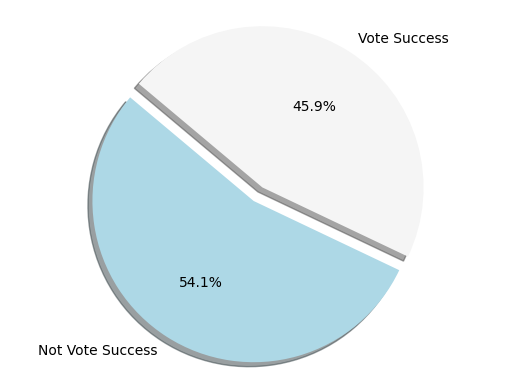

In [27]:
# Data to plot
labels =["Not Vote Success","Vote Success"]
sizes = popularity_data['Vote Success'].value_counts(sort = False)
colors = ["lightblue","whitesmoke"]
explode = (0.1,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140,)
plt.axis('equal')
plt.show()

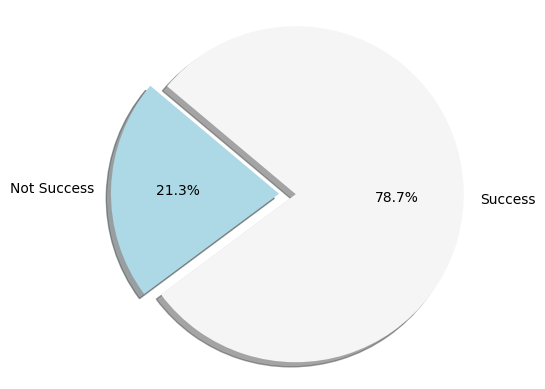

In [28]:
# Data to plot
labels =["Not Success","Success"]
sizes = popularity_data['True Success'].value_counts(sort = False)
colors = ["lightblue","whitesmoke"]
explode = (0.1,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140,)
plt.axis('equal')
plt.show()

* **Feature Selection:** This cell removes any unwanted fields which are not necessary for model training from the dataset.
* The assessed features being dropped are either non-predictive or transformed into other variables (budget, the month of release, and duration).

In [29]:
#title_year IS dropped atm for testing of months ; duration is dropped
popularity_data.drop(['id','budget','original_title','overview','spoken_languages','production_companies','production_countries','release_date','status',
          'tagline','movie_title','vote_average','language','director_name','actor_1_name','actor_2_name','actor_3_name',
          'companies_1','companies_2','companies_3','country','genres','plot_keywords','popularity','gross', 'title_month', 'duration', 'title_year'], axis=1, inplace=True)
popularity_data.columns

Index(['extremelylow', 'verylow', 'low', 'avg', 'high', 'veryhigh',
       'blockbusterhigh', 'Spring', 'Summer', 'Fall', 'Winter', 'Lessthan90',
       '90-120', '120-150', 'Morethan150', 'Adventure', 'Thriller', 'Action',
       'Foreign', 'Comedy', 'Family', 'History', 'Music', 'Horror', 'Western',
       'Drama', 'Crime', 'Animation', 'War', 'TV Movie', 'Science Fiction',
       'Mystery', 'Fantasy', 'Documentary', 'Romance', 'Popularity Success',
       'Vote Success', 'Commercial Success', 'True Success'],
      dtype='object')

* Correlation Matrix (After Feature Selection): They create another correlation matrix though this is a correlation matrix of the features that would be used in the modeling.
* It also assists in determine the relationships that exist between the selected features.

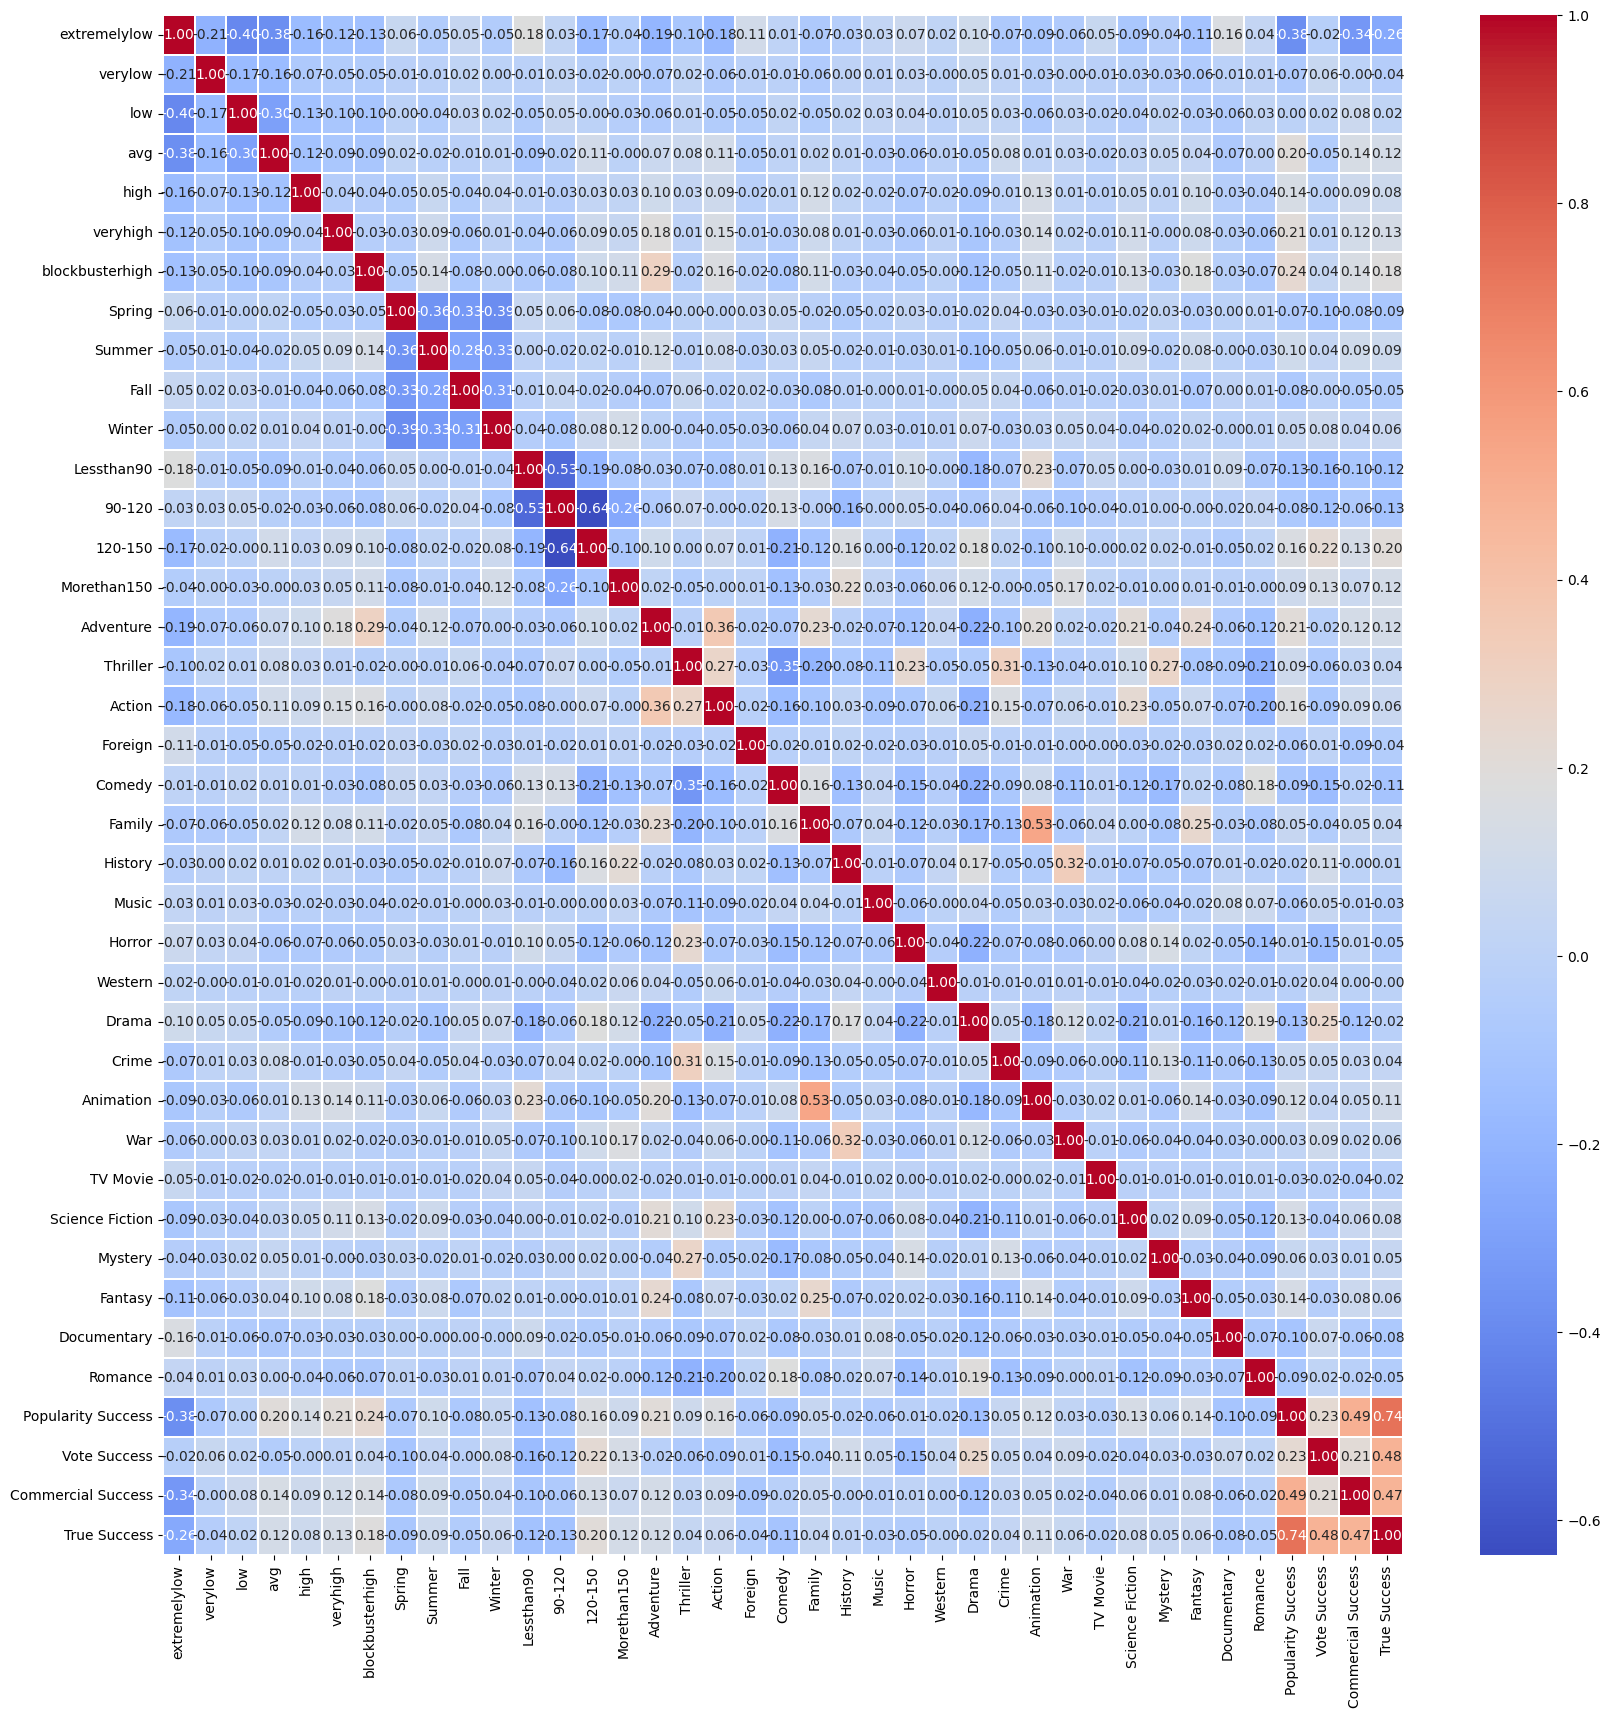

In [30]:
# #correlation matrix with numerical values after drop: so these looking at all feature that will be tested
plt.figure(figsize = (20,20))
g = sns.heatmap(popularity_data[list(popularity_data)].corr(),annot=True, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)

* **Dropping Intermediate Success Metrics:** Excludes the individual success metrics (‘Popularity Success’, ‘Vote Success’, ‘Commercial Success’) as they were included in the making of the ‘True Success’ target variable which is to be used in the training of the model.

In [31]:
#drop the other success metics
popularity_data.drop(['Popularity Success', 'Vote Success', 'Commercial Success'], axis=1, inplace=True)

In [32]:
popularity_data

extremelylow  verylow  low  avg  high  veryhigh  blockbusterhigh  \
0                0        0    0    0     0         0                1   
1                0        0    0    0     0         0                1   
2                0        0    0    0     0         0                1   
3                0        0    0    0     0         0                1   
4                0        0    0    0     0         0                1   
...            ...      ...  ...  ...   ...       ...              ...   
4798             1        0    0    0     0         0                0   
4799             1        0    0    0     0         0                0   
4800             1        0    0    0     0         0                0   
4801             1        0    0    0     0         0                0   
4802             1        0    0    0     0         0                0   

      Spring  Summer  Fall  ...  Crime  Animation  War  TV Movie  \
0          0       0     0  ...      0          0    0         0   
1          0       1     0  ...      0          0    0         0   
2          0       0     0  ...      1          0    0         0   
3          0       1     0  ...      1          0    0         0   
4          1       0     0  ...      0          0    0         0   
...      ...     ...   ...  ...    ...        ...  ...       ...   
4798       0       0     1  ...      1          0    0         0   
4799       0       0     0  ...      0          0    0         0   
4800       0       0     0  ...      0          0    0         1   
4801       0       1     0  ...      0          0    0         0   
4802       0       0     1  ...      0          0    0         0   

      Science Fiction  Mystery  Fantasy  Documentary  Romance  True Success  
0                   1        0        1            0        0             1  
1                   0        0        1            0        0             1  
2                   0        0        0            0        0             1  
3                   0        0        0            0        0             1  
4                   1        0        0            0        0             0  
...               ...      ...      ...          ...      ...           ...  
4798                0        0        0            0        0             0  
4799                0        0        0            0        1             0  
4800                0        0        0            0        1             0  
4801                0        0        0            0        0             0  
4802                0        0        0            1        0             0  

[4716 rows x 36 columns]

# Model Building and Evaluation:

* Four classification models are trained and evaluated: Beside the basic classifiers including Decision Tree, Random Forest, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM).
* Cross-validation is used to describe performance of the model on data which has not been used for model building.
* The possible evaluation criteria for the work describe accuracy, precision, recall, F1-score, and the ROC AUC(Area Under Curve).

**Data Splitting:**

* The dataset is divided into training and testing based on feature generated by the formula: popularity_data[‘is_train’] = np.random.uniform(0, 1, len(popularity_data)) <= .75. This leads to a creation of a boolean column ‘is_train’ where about three-quarter of the data is split into the training set with the remaining one-quarter split into the testing set.
* The data is then split between the training and testing DataFrames.
* The ’True Success’ and the features are divided into X_train, Y_train for training and X_test, Y_test for testing.

In [33]:
from sklearn import metrics

popularity_data['is_train'] = np.random.uniform(0, 1, len(popularity_data)) <= .75

train = popularity_data[popularity_data['is_train']==True].copy()
test = popularity_data[popularity_data['is_train']==False].copy()
train.drop(['is_train'], axis=1, inplace=True)
test.drop(['is_train'], axis=1, inplace=True)

Y_train = train["True Success"]
X_train = train.drop(labels = ["True Success"],axis = 1)

Y_test = test["True Success"]
X_test = test.drop(labels = ["True Success"],axis = 1)


In [34]:
print(len(train))


3511


In [35]:
print(len(test))

1205


Decision tree to determine success:

* A Decision Tree Classifier is implemented out of DecisionTreeClassifier and the model is trained in dtc.fit(X_train, Y_train).
* The performance measure of the model is done through cross-validation, (cross_val_score) and the accuracy from the test dataset.In order to better inspect the model’s predictions a confusion matrix is created.
* An ROC curve is used to compare how well the model discriminates between successes and failures in movies.

In [36]:
# here's the decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=7)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=7)

In [37]:
from sklearn.model_selection import  cross_val_score
# Decision Tree - Cross Validation Score
cross_val_dtc = cross_val_score(dtc, X_train, Y_train, cv=10)
cross_val_dtc.mean()

0.7312240999740999

In [38]:
result = dtc.predict_proba(X_test)[:]
test_result = np.asarray(Y_test)

dtcResults = pd.DataFrame(result[:,1])
dtcResults['Predict'] = dtcResults[0].map(lambda s: 1 if s >= 0.5  else 0)
dtcResults['testAnswer'] = pd.DataFrame(test_result)

dtcResults['Correct'] = np.where((dtcResults['Predict'] == dtcResults['testAnswer']), 1, 0)
dtcResults.head(10)

0  Predict  testAnswer  Correct
0  0.400000        0           1        0
1  0.400000        0           1        0
2  0.655172        1           1        1
3  0.456140        0           1        0
4  0.456140        0           1        0
5  0.655172        1           1        1
6  0.655172        1           1        1
7  0.655172        1           1        1
8  0.704918        1           1        1
9  0.456140        0           0        1

In [39]:
from sklearn.metrics import confusion_matrix
dtc_confusion = confusion_matrix(dtcResults['Predict'], dtcResults['testAnswer'])
print(dtc_confusion) #Predict 1 and Test 0; Predict 0 and Test 1 #Predict 1 and Test 0; Predict 0 and Test 0

[[910 212]
 [ 29  54]]


<Axes: >

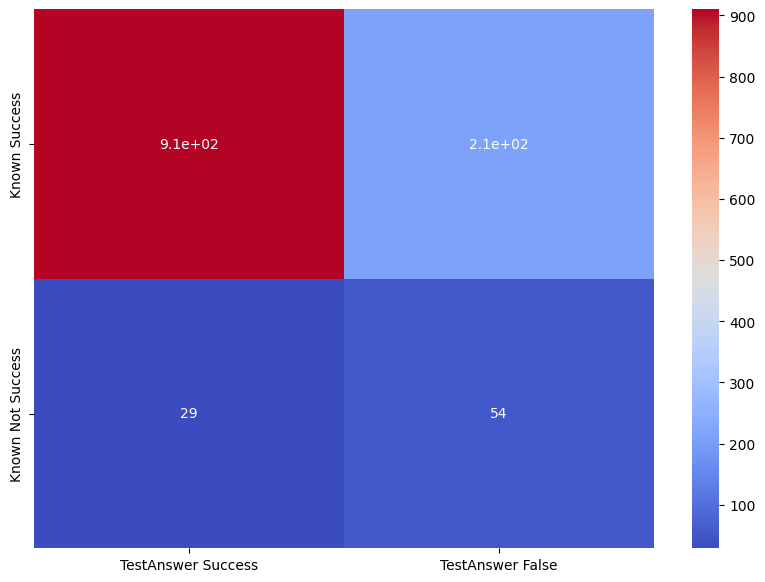

In [40]:
con_dec = pd.DataFrame(dtc_confusion, index = [i for i in ["Known Success", "Known Not Success"]],
columns = [i for i in ["TestAnswer Success", "TestAnswer False"]])
plt.figure(figsize = (10,7))
plt.xlabel("Predict")
plt.ylabel("TestAnswer")
sns.heatmap(con_dec, cmap = "coolwarm", annot=True)

In [41]:
#test Data set - score
dtcResults['Correct'].mean()


0.8

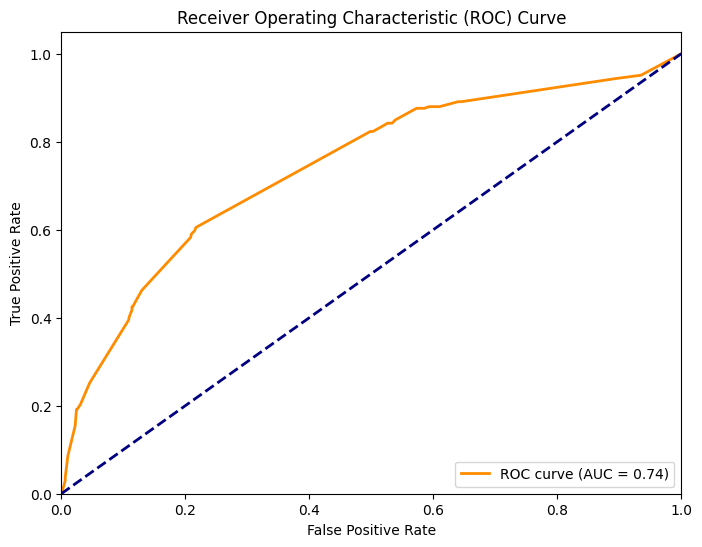

In [42]:
# Import necessary functions from sklearn.metrics
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_pred_proba = dtc.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Random forest model:

* A Random Forest Classifier (RandomForestClassifier), is employed similar to the steps used for the Decision Tree such as training, evaluation and visualizations.

In [43]:
#heres a random forest tree model
from sklearn.ensemble import RandomForestClassifier

randofor = RandomForestClassifier(max_depth=7)
randofor.fit(X_train, Y_train)


RandomForestClassifier(max_depth=7)

In [44]:
#Random Forest - cross validation score
cross_val_randofor =  cross_val_score(randofor, X_train, Y_train, cv=10)
cross_val_randofor.mean()

0.7511363636363637

In [45]:
result = randofor.predict_proba(X_test)[:]
randoforResults = pd.DataFrame(result[:,1])
randoforResults['Predict'] = randoforResults[0].map(lambda s: 1 if s >= 0.5  else 0)
randoforResults['testAnswer'] = pd.DataFrame(test_result)

randoforResults['Correct'] = np.where((randoforResults['Predict'] == randoforResults['testAnswer'])
                     , 1, 0)
randoforResults.head()

0  Predict  testAnswer  Correct
0  0.527123        1           1        1
1  0.602569        1           1        1
2  0.674898        1           1        1
3  0.546836        1           1        1
4  0.563860        1           1        1

In [46]:
from sklearn.metrics import confusion_matrix
randofor_confusion = confusion_matrix(randoforResults['Predict'], randoforResults['testAnswer'])
print(randofor_confusion) #Predict 1 and Test 0; Predict 0 and Test 1 #Predict 1 and Test 0; Predict 0 and Test 0

[[929 227]
 [ 10  39]]


<Axes: >

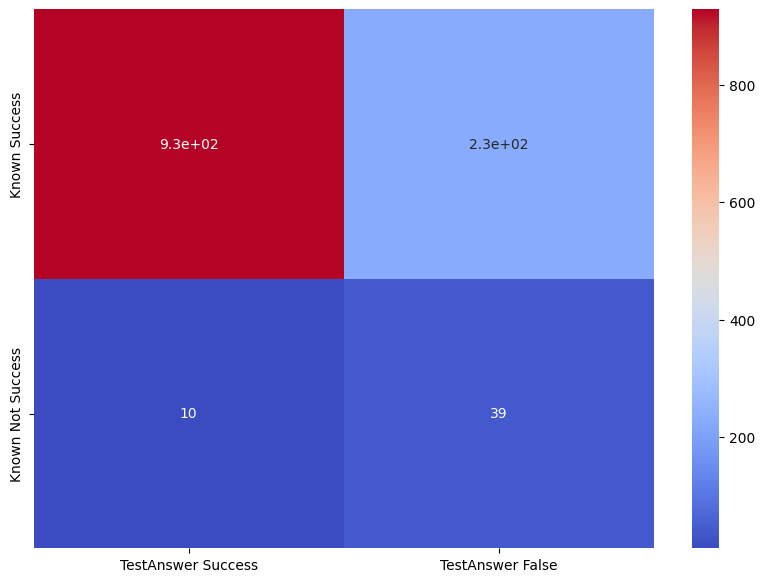

In [47]:
con_dec = pd.DataFrame(randofor_confusion, index = [i for i in ["Known Success", "Known Not Success"]],
columns = [i for i in ["TestAnswer Success", "TestAnswer False"]])
plt.figure(figsize = (10,7))
plt.xlabel("Predict")
plt.ylabel("TestAnswer")
sns.heatmap(con_dec, cmap = "coolwarm", annot=True)

In [48]:
randoforResults['Correct'].mean()


0.8033195020746888

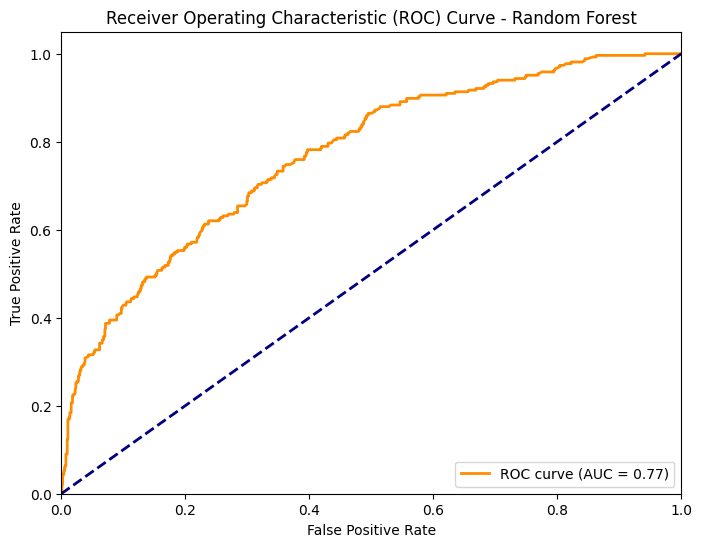

In [49]:
# Get the predicted probabilities for the positive class
y_pred_proba = randofor.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

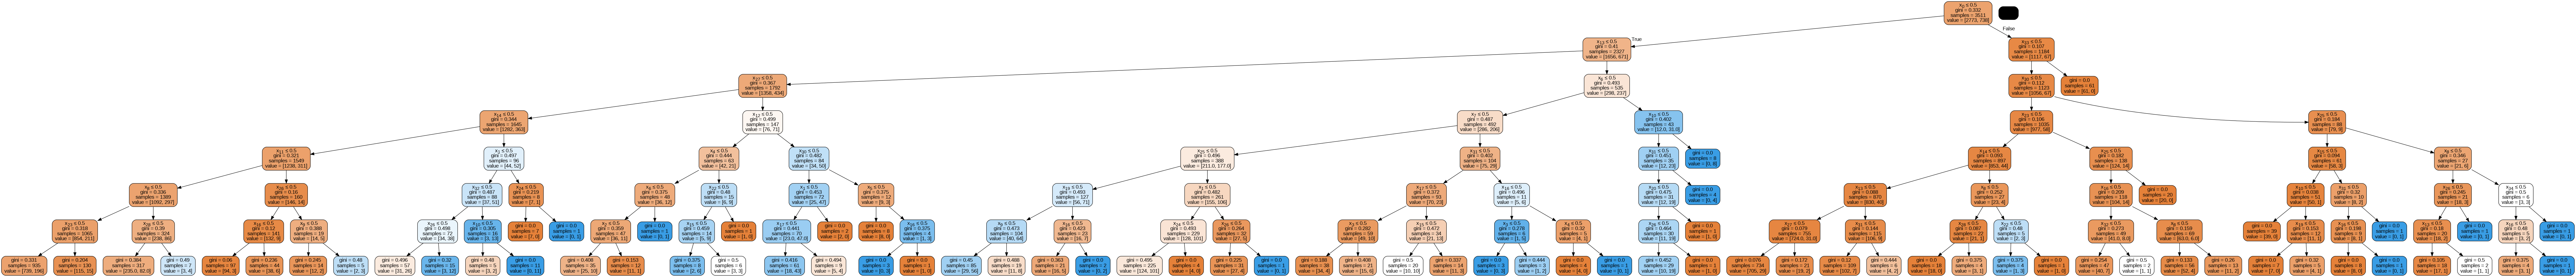

In [50]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus# Export as dot file
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

K-Nearest Neighbors:

* A K-Nearest Neighbors Classifier (KNeighborsClassifier) is used, again following the same steps of training, evaluation, and visualization.

In [51]:
#k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100) #can play around with this (neighbors)
knn.fit(X_train, Y_train)



KNeighborsClassifier(n_neighbors=100)

In [52]:
cross_val_knn = cross_val_score(knn, X_train, Y_train, cv=10)
cross_val_knn.mean()

0.7841087153587154

In [53]:
result = knn.predict_proba(X_test)[:]
knnResults = pd.DataFrame(result[:,1])
knnResults['Predict'] = knnResults[0].map(lambda s: 1 if s >= 0.5  else 0)
knnResults['testAnswer'] = pd.DataFrame(test_result)

knnResults['Correct'] = np.where((knnResults['Predict'] == knnResults['testAnswer'])
                     , 1, 0)
knnResults.head(10)

0  Predict  testAnswer  Correct
0  0.54        1           1        1
1  0.48        0           1        0
2  0.63        1           1        1
3  0.44        0           1        0
4  0.36        0           1        0
5  0.50        1           1        1
6  0.59        1           1        1
7  0.50        1           1        1
8  0.37        0           1        0
9  0.53        1           0        0

In [54]:
from sklearn.metrics import confusion_matrix
knn_confusion = confusion_matrix(knnResults['Predict'], knnResults['testAnswer'])
print(knn_confusion) #Predict 1 and Test 0; Predict 0 and Test 1 #Predict 1 and Test 0; Predict 0 and Test 0

[[927 239]
 [ 12  27]]


<Axes: >

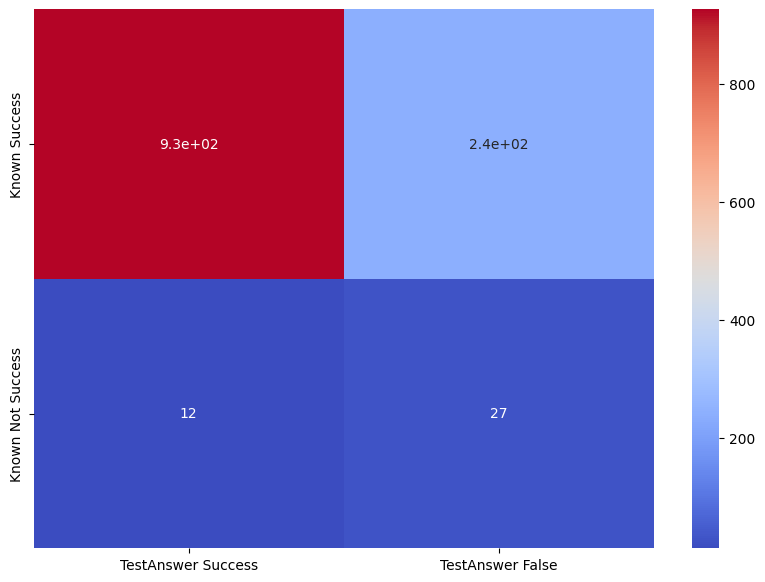

In [55]:
con_dec = pd.DataFrame(knn_confusion, index = [i for i in ["Known Success", "Known Not Success"]],
columns = [i for i in ["TestAnswer Success", "TestAnswer False"]])
plt.figure(figsize = (10,7))
plt.xlabel("Predict")
plt.ylabel("TestAnswer")
sns.heatmap(con_dec, cmap = "coolwarm", annot=True)

In [56]:
knnResults['Correct'].mean()


0.791701244813278

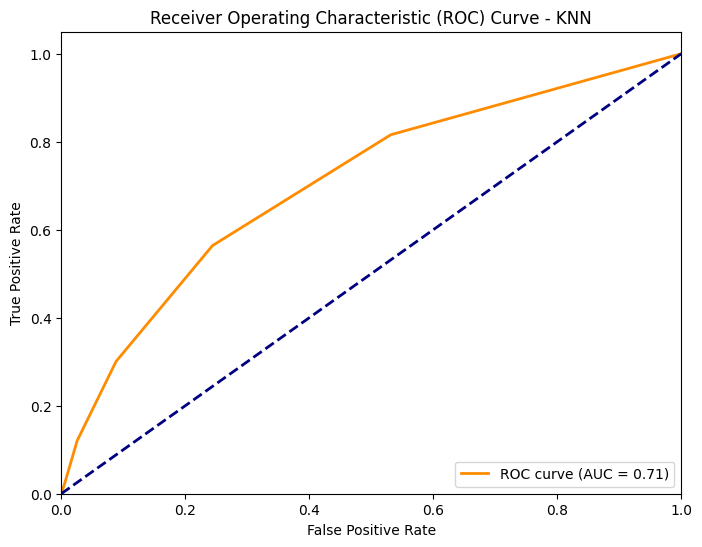

In [57]:

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, Y_train)

# Get the predicted probabilities for the positive class
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc="lower right")
plt.show()

**Support Vector Machine (SVM) Model:**

* An SVM classifier (svm.SVC) is used. The process involves training, evaluation, and visualization as with the previous models.

In [58]:
from sklearn import svm
svm = svm.SVC(kernel='linear', gamma='scale', probability=True)
svm.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [59]:
cross_val_svm = cross_val_score(svm, X_train, Y_train, cv=10)
cross_val_svm.mean()

0.7525900025900025

In [60]:
#trying to get svm to work??
result = svm.predict_proba(X_test)
svmResults = pd.DataFrame(result[:,1])
svmResults['Predict'] = svmResults[0].map(lambda s: 1 if s >= 0.5  else 0)
svmResults['testAnswer'] = pd.DataFrame(test_result)
svmResults['Correct'] = np.where((svmResults['Predict'] == svmResults['testAnswer'])
                     , 1, 0)
svmResults


0  Predict  testAnswer  Correct
0     0.641054        1           1        1
1     0.641037        1           1        1
2     0.641014        1           1        1
3     0.641070        1           1        1
4     0.641073        1           1        1
...        ...      ...         ...      ...
1200  0.194646        0           0        1
1201  0.194644        0           0        1
1202  0.194654        0           0        1
1203  0.194679        0           0        1
1204  0.194599        0           0        1

[1205 rows x 4 columns]

In [61]:
from sklearn.metrics import confusion_matrix
svm_confusion = confusion_matrix(svmResults['Predict'], svmResults['testAnswer'])
print(svm_confusion) #Predict 1 and Test 0; Predict 0 and Test 1 #Predict 1 and Test 0; Predict 0 and Test 0

[[926 241]
 [ 13  25]]


<Axes: >

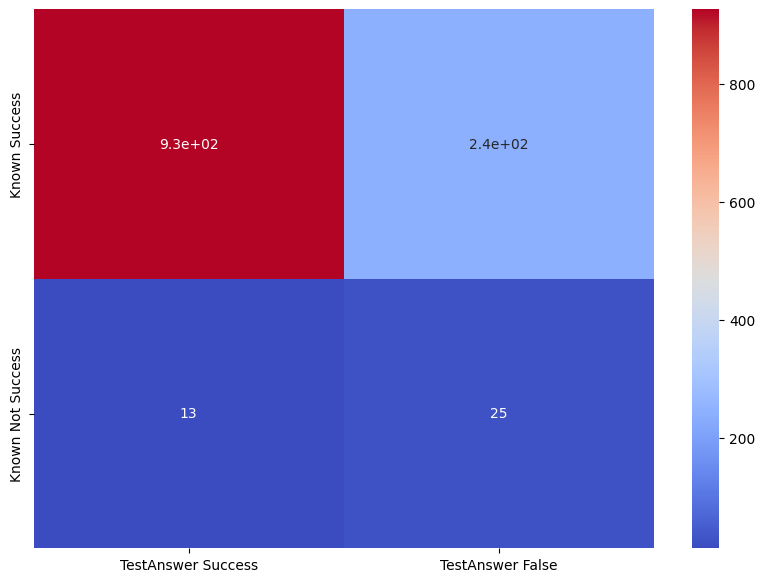

In [62]:
con_dec = pd.DataFrame(svm_confusion, index = [i for i in ["Known Success", "Known Not Success"]],
columns = [i for i in ["TestAnswer Success", "TestAnswer False"]])
plt.figure(figsize = (10,7))
plt.xlabel("Predict")
plt.ylabel("TestAnswer")
sns.heatmap(con_dec, cmap = "coolwarm", annot=True)

In [63]:
svmResults['Correct'].mean()

0.7892116182572614

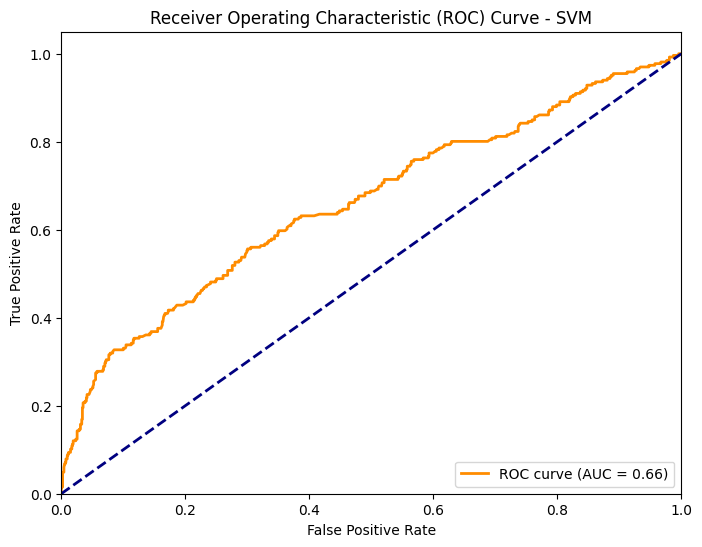

In [64]:
# Get the predicted probabilities for the positive class
y_pred_proba = svm.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.show()

Feature Importance (Decision Tree and Random Forest):

* These cells output and display the feature importance of Decision Tree and Random Forest models.
* This makes it easier to identify which features make the biggest impact on the model outcome.

Decision tree:

In [65]:
#decision tree
dtcFeatures = pd.DataFrame(dtc.feature_importances_)
dtcFeatures["name"] = list(X_train)
dtcFeatures.sort_values(by=0, ascending=False).head()

0          name
0   0.313546  extremelylow
13  0.127244       120-150
14  0.080174   Morethan150
27  0.069544     Animation
16  0.035305      Thriller

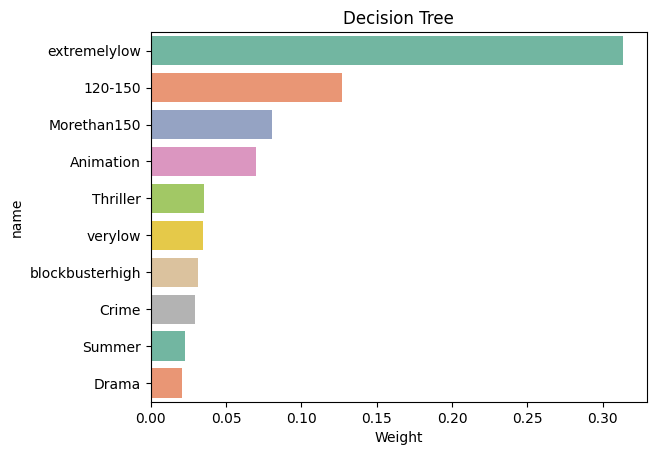

In [66]:
g = sns.barplot(x=0, y="name", data=dtcFeatures.sort_values(by=0, ascending=False)[0:10], palette="Set2", orient="h") # Pass column names as strings for x and y
g.set_xlabel("Weight")
g = g.set_title("Decision Tree")

Random Forest:

In [67]:
#random forest
randoforFeatures = pd.DataFrame(randofor.feature_importances_)
randoforFeatures["name"] = list(X_train)
randoforFeatures.sort_values(by=0, ascending=False).head()

0             name
0   0.166672     extremelylow
13  0.115839          120-150
6   0.063276  blockbusterhigh
12  0.055195           90-120
27  0.054812        Animation

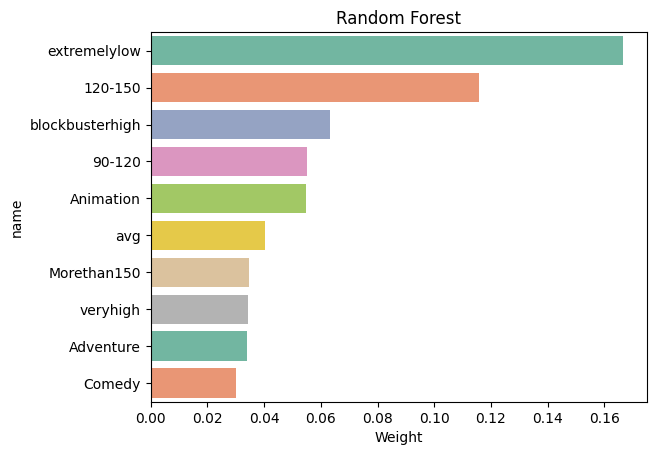

In [68]:
g = sns.barplot(x=0, y="name", data=randoforFeatures.sort_values(by=0, ascending=False)[0:10], palette="Set2", orient="h")
g.set_xlabel("Weight")
g = g.set_title("Random Forest")

# Model Comparison and Selection:

**Model Comparison and Selection:**

* These cells interpret the result of each model that has been developed in this article and put the result into a single DataFrame with name results_df.
* These statistics encompasses accuracy, precision, recall, F1 scoring and ROC AUC all of which are embedded in a DataFrame.
* The results are illustrated in bar plot to compare the models considered in this study.
* Models which perform best based on the chosen parameter (s) are considered the best model.

Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0        Decision Tree  0.801660   0.680000  0.191729  0.299120  0.740776
1        Random Forest  0.803320   0.795918  0.146617  0.247619  0.768911
2  K-Nearest Neighbors  0.776763   0.490798  0.300752  0.372960  0.705738
3                  SVM  0.789212   0.657895  0.093985  0.164474  0.659512

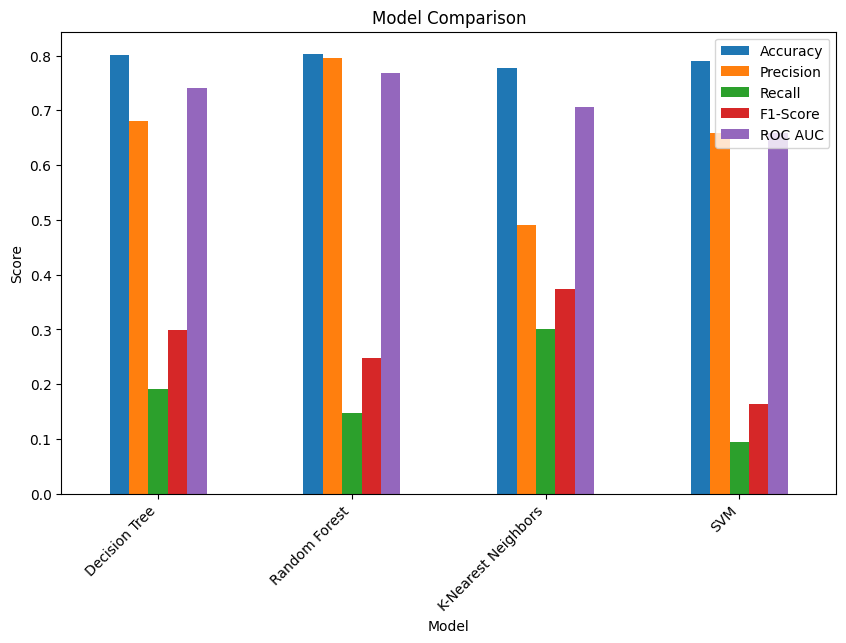

In [69]:
# Create a list of model names and their corresponding instances
models = [
    ('Decision Tree', dtc),
    ('Random Forest', randofor),
    ('K-Nearest Neighbors', knn),
    ('SVM', svm),
]

# Create an empty list to store the results
results = []

# Iterate through the models and calculate evaluation metrics
for model_name, model in models:
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, y_pred)  # Using 'metrics' already imported
    precision = metrics.precision_score(Y_test, y_pred)
    recall = metrics.recall_score(Y_test, y_pred)
    f1 = metrics.f1_score(Y_test, y_pred)

    # ROC AUC Calculation
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_proba)
    roc_auc = metrics.auc(fpr, tpr)

    results.append([model_name, accuracy, precision, recall, f1, roc_auc])

# Create a pandas DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])

# Print the results DataFrame
display(results_df) # Using 'display' already imported

# Visualize the results using a bar plot
results_df.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'], kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust()
#plt.tight_layout()
plt.show()

# Prediction

**Prediction Function:**

* A function predict_movie_success is defined to take movie features as input and predict whether the movie will be successful using the best selected model.

In [70]:
# Select the best model based on a chosen metric (e.g., Accuracy)
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model = None

if best_model_name == 'Decision Tree':
    best_model = dtc
elif best_model_name == 'Random Forest':
    best_model = randofor
elif best_model_name == 'K-Nearest Neighbors':
    best_model = knn
elif best_model_name == 'SVM':
    best_model = svm

# Function to predict movie success
def predict_movie_success(movie_features):
    """Predicts the success of a movie based on the provided features.

    Args:
        movie_features (dict): A dictionary containing the movie features.
                               Keys should match the column names of X_train.

    Returns:
        int: 1 if the movie is predicted to be successful, 0 otherwise.
    """

    # Create a dataframe with the input features
    input_data = pd.DataFrame([movie_features], columns=X_train.columns)

    # Make prediction using the best model
    prediction = best_model.predict(input_data)[0]

    return prediction

** Example Usage:**
* An example is provided where movie data is passed to the function to demonstrate its usage.

In [72]:
# Example usage
movie_data = {
    'extremelylow': 0,
    'verylow': 0,
    'low': 0,
    'avg': 0,
    'high': 0,
    'veryhigh': 0,
    'blockbusterhigh': 1,
    'Spring': 0,
    'Summer': 0,
    'Fall': 1,
    'Winter': 0,
    'Lessthan90': 0,
    '90-120': 0,
    '120-150': 0,
    'Morethan150': 1,
    'Action': 1,
    'Adventure': 1,
    'Fantasy': 1,
    'ScienceFiction': 0,
    'Crime': 1,
    'Drama': 1,
    'Thriller': 0,
    'Animation': 1,
    'Family': 1,
    'Western': 0,
    'Comedy': 1,
    'Romance': 0,
    'Horror': 0,
    'Mystery': 1,
    'History': 0,
    'War': 1,
    'Music': 0,
    'Documentary': 0,
    'Foreign': 0,
    'TVMovie': 0,
}

input_data = pd.DataFrame([movie_data], columns=X_train.columns)
prediction_proba = best_model.predict_proba(input_data)
print(f"Predicted Probabilities: {prediction_proba}")

prediction = predict_movie_success(movie_data)
print(f"Predicted success: {prediction}")  #Successful = 1 & Unsuccessful = 0

Predicted Probabilities: [[0.4078917 0.5921083]]
Predicted success: 1


* Predicted Probabilities: [[Unsuccessful Probability, Success Probability]]

**Conclusion:**

* The project proves that it is possible to use machine learning in order to predict success of movies based on data provided before the movie release. The chosen model, Decision Tree or Random Forest, provides fairly good results for the prognosis of a movie success. Feature engineering indicates the key predictors of success from the data analysis process. It might be helpful to filmmakers and studios to base their decision of movie production and marketing strategies on this project.